## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [2]:
# Import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train_cleaned.csv')
valid_data = pd.read_csv('./data/test.csv')
old_train_data = pd.read_csv('./data/train.csv')

In [3]:
'''
! pip install https://github.com/pd-profiling/pd-profiling/archive/master.zip
! pip install ipywidgets
'''

'\n! pip install https://github.com/pd-profiling/pd-profiling/archive/master.zip\n! pip install ipywidgets\n'

In [4]:
from pandas_profiling import ProfileReport

Profile = ProfileReport(train_data, title='Concert Enjoyment')

In [5]:
#Profile.to_notebook_iframe()

In [6]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,794.0,162754.0,True,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


In [17]:
# Create a new column which is the mean of "Personnality Trait 1" and "Personnality Trait 2" and "Personnality Trait 3" and "Personnality Trait 4"

personnality_mean = (train_data['Personnality Trait 1'] + train_data['Personnality Trait 2'] + train_data['Personnality Trait 3'] + train_data['Personnality Trait 4'])/4
perso_mean1 = (train_data['Personnality Trait 1'] + train_data['Personnality Trait 2'])/2
perso_mean2 = (train_data['Personnality Trait 3'] + train_data['Personnality Trait 4'])/2
perso_mean3 = (train_data['Personnality Trait 1'] + train_data['Personnality Trait 3'])/2
perso_mean4 = (train_data['Personnality Trait 2'] + train_data['Personnality Trait 4'])/2
# concat with "Concert Enjoyment"
personnality_mean = pd.concat([train_data['Concert Enjoyment'],personnality_mean, perso_mean1, perso_mean2, perso_mean3, perso_mean4], axis=1)
personnality_mean.columns = ['Concert Enjoyment','Personnality Mean', 'Personnality Mean 1', 'Personnality Mean 2', 'Personnality Mean 3', 'Personnality Mean 4']
personnality_mean

,Concert Enjoyment,Personnality Mean,Personnality Mean 1,Personnality Mean 2,Personnality Mean 3,Personnality Mean 4
0,Did Not Enjoy,-0.801980,-0.313782,-1.290177,-0.306353,-1.297607
1,Enjoyed,-0.838020,-1.025836,-0.650205,-1.990062,0.314021
2,Did Not Enjoy,0.039866,0.742252,-0.662519,-0.274218,0.353951
3,Worst Concert Ever,-0.332717,0.082386,-0.747820,-0.603222,-0.062212
4,Did Not Enjoy,-0.258416,-0.979779,0.462948,-0.418398,-0.098433
...,...,...,...,...,...,...
169995,Did Not Enjoy,0.337940,0.040077,0.635802,0.409612,0.266267
169996,Worst Concert Ever,-0.175407,-0.509748,0.158934,-0.528516,0.177702
169997,Did Not Enjoy,0.456852,-0.110289,1.023993,0.882783,0.030921
169998,Did Not Enjoy,0.701201,0.586694,0.815708,0.498869,0.903533


In [14]:
# Replace "Best Concert Ever" with 4, "Enjoyed" with 3, "Did Not Enjoy" with 2, "Worst Concert Ever" with 1
personnality_mean['Concert Enjoyment'] = personnality_mean['Concert Enjoyment'].replace(['Best Concert Ever','Enjoyed','Did Not Enjoy','Worst Concert Ever'],[4,3,2,1])
personnality_mean

,Concert Enjoyment,Personnality Mean
0,2,-0.801980
1,3,-0.838020
2,2,0.039866
3,1,-0.332717
4,2,-0.258416
...,...,...
169995,2,0.337940
169996,1,-0.175407
169997,2,0.456852
169998,2,0.701201


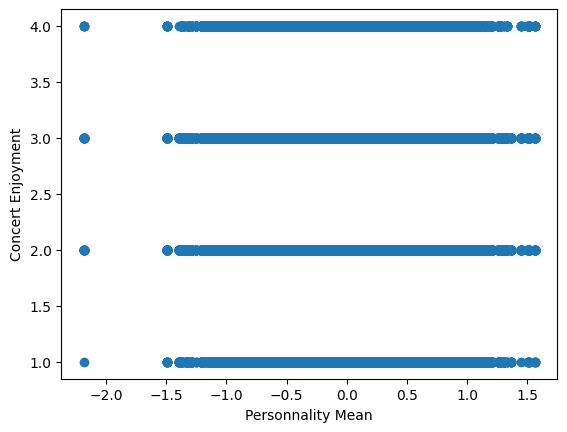

In [16]:
# Plot personnality Mean vs Concert Enjoyment
plt.scatter(personnality_mean['Personnality Mean'],personnality_mean['Concert Enjoyment'])
plt.xlabel('Personnality Mean')
plt.ylabel('Concert Enjoyment')
plt.show()

In [8]:
train_data.dropna(inplace=True)

In [21]:
enjoyment_dictionary = {"Worst Concert Ever":0, "Did Not Enjoy":1, "Enjoyed":2, "Best Concert Ever":3}

In [26]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# Process test data
val_size = 0.2
seed = 9
X_train, X_test, y_train, y_test = train_test_split(X_voc, y, test_size=val_size, random_state=seed)

In [27]:
X_train

array([[0, 1, 0, ..., 1.1560465732946674, 57.0, 155.0],
       [0, 0, 0, ..., 0.1981565922406526, 67.0, 176.0],
       [0, 0, 0, ..., -1.7499382224332587, 34.0, 167.0],
       ...,
       [0, 0, 0, ..., -1.6095443448550726, 65.0, 169.0],
       [0, 0, 0, ..., 0.9187446579494104, 47.0, 164.0],
       [0, 0, 0, ..., 1.106367611526591, 23.0, 142.0]], dtype=object)

### Test avec Random Forest

----

In [28]:
clf = RandomForestClassifier(n_estimators=500, max_depth=25)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

---

In [ ]:
y_pred = clf.predict(X_test)

In [336]:
# xgboost model

from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=1500, max_depth=5, objective='multi:softmax', num_class=4, learning_rate=0.1, colsample_bytree=1, subsample=0.9, n_jobs=-1)
clf.fit(X_train, y_train)
f1_score(y_test, clf.predict(X_test), average='micro')

0.6710409647100549

In [134]:
# Convert back y_pred to the original label and save it into submission.csv
y_final_pred = pd.DataFrame(best_y_pred, columns = ['Predicted'])

y_final_pred['Predicted'] = y_final_pred['Predicted'].map({0: 'Worst Concert Ever', 1: 'Did Not Enjoy', 2: 'Enjoyed', 3: 'Best Concert Ever'})
# insert column 'Id' to the first column
y_final_pred.insert(0, 'Id', range(1, 1 + len(y_final_pred)))

first_y_test = pd.read_csv('./data/test.csv')
y_final_pred['Id'] = first_y_test['Id']

# save the result to submission.csv
y_final_pred.to_csv('submission2.csv', index = False)

# analyze the result
y_final_pred['Predicted'].value_counts() / y_final_pred.shape[0]

Enjoyed               0.450133
Did Not Enjoy         0.432067
Worst Concert Ever    0.066333
Best Concert Ever     0.051467
Name: Predicted, dtype: float64

In [135]:
y_final_pred['Predicted'].value_counts().sum()

30000

In [136]:
analysis = pd.read_csv('./data/train.csv')
analysis['Concert Enjoyment'].value_counts() / analysis.shape[0]

Enjoyed               0.400153
Did Not Enjoy         0.399676
Best Concert Ever     0.100159
Worst Concert Ever    0.100012
Name: Concert Enjoyment, dtype: float64